In [1]:
from wordcloud import WordCloud

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
dataset_dir = 'sentiment140'

DATASET_ENCODING = "ISO-8859-1"

DATASET_COLUMNS = ["sentiment", "ids", "date", "flag", "user", "tweet"]
df = pd.read_csv('../datasets/training.1600000.processed.noemoticon.csv',
                 delimiter=',', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)

df = df[['tweet', 'sentiment']]

df.head()


,tweet,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [3]:

X = df.iloc[:, 0]


y = df.iloc[:, 1]

X, y


(0          @switchfoot http://twitpic.com/2y1zl - Awww, t...
 1          is upset that he can't update his Facebook by ...
 2          @Kenichan I dived many times for the ball. Man...
 3            my whole body feels itchy and like its on fire 
 4          @nationwideclass no, it's not behaving at all....
                                  ...                        
 1599995    Just woke up. Having no school is the best fee...
 1599996    TheWDB.com - Very cool to hear old Walt interv...
 1599997    Are you ready for your MoJo Makeover? Ask me f...
 1599998    Happy 38th Birthday to my boo of alll time!!! ...
 1599999    happy #charitytuesday @theNSPCC @SparksCharity...
 Name: tweet, Length: 1600000, dtype: object,
 0          0
 1          0
 2          0
 3          0
 4          0
           ..
 1599995    4
 1599996    4
 1599997    4
 1599998    4
 1599999    4
 Name: sentiment, Length: 1600000, dtype: int64)

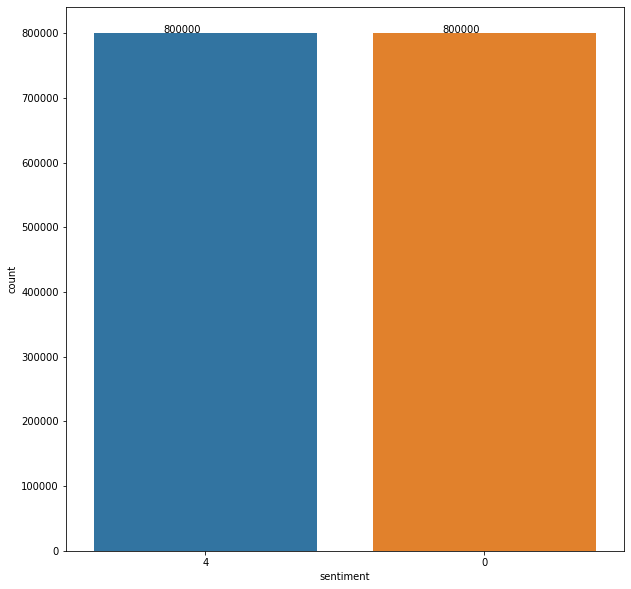

In [4]:
plt.figure(figsize=(10, 10))
ax = sns.countplot(x=y,  data=df,
                   order=y.value_counts().index)
for p, label in zip(ax.patches, y.value_counts()):
    ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))


Text(0.5, 1.0, 'Positive words cloud')

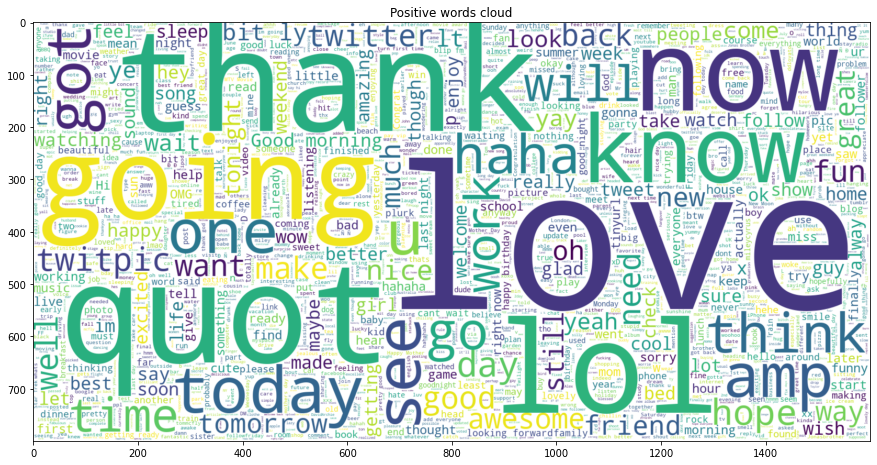

In [6]:
plt.figure(figsize=(15, 15))
options = [4]
cond = df.iloc[:, 1].isin(options)
result = df[cond].iloc[:, 0].values
wc = WordCloud(max_words=2000, width=1600, background_color='white',
               height=800).generate(" ".join(result))

plt.imshow(wc, interpolation='bilinear')
plt.title('Positive words cloud')


Text(0.5, 1.0, 'Negative words cloud')

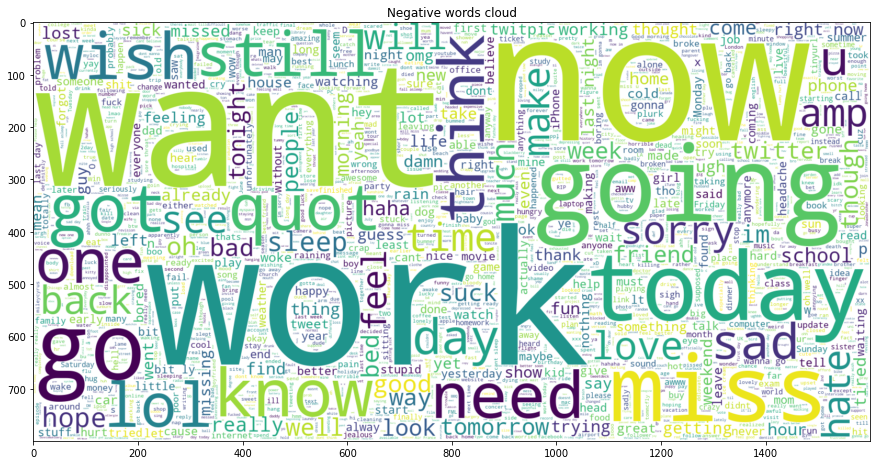

In [7]:

options = [0]

plt.figure(figsize=(15, 15))
cond = df.iloc[:, 1].isin(options)
result = df[cond].iloc[:, 0].values
wc = WordCloud(max_words=2000, width=1600, background_color='white',
               height=800).generate(" ".join(result))
plt.imshow(wc, interpolation='bilinear')
plt.title('Negative words cloud')
